In [1]:
# Import necessary packages
%matplotlib inline
import matplotlib.pyplot as plt #matplotlib
import numpy as np #numpy
import pandas as pd #pandas
import requests #requests
import datetime #datetime
import re #regularexpressions
import subprocess
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RandomizedLasso
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from pandas.tools.plotting import scatter_matrix
import collections

In [2]:
import sklearn
sklearn.__version__

'0.17'

In [3]:
# Read in data
nsidc_df = pd.read_csv('nsidc_clean_df_2016-05-22_1955.csv')

In [4]:
# Drop the first column which is a duplicated index
nsidc_df.drop(nsidc_df.columns[[0]], axis=1, inplace=True)

In [5]:
# Check datatypes
nsidc_df.dtypes

dataset_id                   object
unique_users_ip               int64
scrape_date                  object
scrape_time                  object
version_clean                 int64
title_original               object
doi_address_clean            object
citation_date_clean         float64
count_data_format             int64
data_format_string           object
contributors_clean           object
contributor_list             object
contributor_last_names       object
count_contributors            int64
spatial_coverage_clean       object
count_spatial_coverage        int64
spatial_resolution_clean     object
count_spatial_resolution      int64
platforms_clean              object
count_platforms               int64
sensors_clean                object
count_sensors                 int64
update_frequency             object
location_clean               object
count_locations               int64
keyword_clean                object
count_keyword                 int64
last_updated                

In [6]:
# Assign citation_date_clean the datatype category for later linear regression
nsidc_df["citation_date_clean"] = nsidc_df["citation_date_clean"].astype('category')

In [7]:
# Describe unique_users_ip column
nsidc_df['unique_users_ip'].describe()

count      797.000000
mean       150.542033
std       1214.588623
min          1.000000
25%         21.000000
50%         38.000000
75%         70.000000
max      24447.000000
Name: unique_users_ip, dtype: float64

In [8]:
# Describe unique_users_ip column
nsidc_df[nsidc_df.update_frequency == "2015"].count()

dataset_id                  11
unique_users_ip             11
scrape_date                 11
scrape_time                 11
version_clean               11
title_original              11
doi_address_clean           11
citation_date_clean         11
count_data_format           11
data_format_string          11
contributors_clean          11
contributor_list            11
contributor_last_names      11
count_contributors          11
spatial_coverage_clean      11
count_spatial_coverage      11
spatial_resolution_clean    11
count_spatial_resolution    11
platforms_clean             11
count_platforms             11
sensors_clean               11
count_sensors               11
update_frequency            11
location_clean              11
count_locations             11
keyword_clean               11
count_keyword               11
last_updated                11
count_page_ref              11
count_dataset_ref_out       11
dataset_ref_out              8
count_dataset_ref_in        11
dataset_

In [9]:
# Describe citation_date_clean column
nsidc_df.citation_date_clean.describe()

count      797
unique      28
top       2003
freq        80
Name: citation_date_clean, dtype: float64

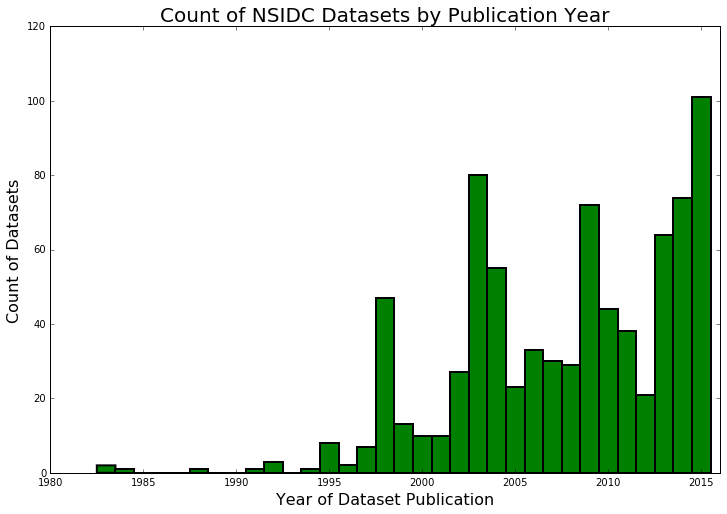

In [10]:
fig = plt.figure(figsize=(12,8))  # create a figure object
axes = fig.add_subplot(1, 1, 1)  # create an axes object in the figure


# Set bin size to 1
binwidth = 1
# Plot a histogram of citation dates for the whole dataframe
plt.hist(nsidc_df['citation_date_clean'], bins=np.arange(min(nsidc_df['citation_date_clean']), 
                                                         max(nsidc_df['citation_date_clean']) + binwidth, binwidth), 
         color='green', linewidth=2, align='left')
# Set the x limit
plt.xlim([1980, 2016])
# Add x-axis label
plt.xlabel('Year of Dataset Publication', fontsize=16)
# Add y-axis label
plt.ylabel('Count of Datasets', fontsize=16)
# Add a plot title
plt.title('Count of NSIDC Datasets by Publication Year', fontsize=20)
# Save plot as jpg
plt.savefig('Histogram_DatasetPublicationYear.jpg')

In [11]:
# Describe count_contributors column
nsidc_df.count_contributors.describe()

count    797.000000
mean       2.601004
std        1.651526
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: count_contributors, dtype: float64

In [12]:
# Check median value of count_contributors
np.median(nsidc_df['count_contributors'])

2.0

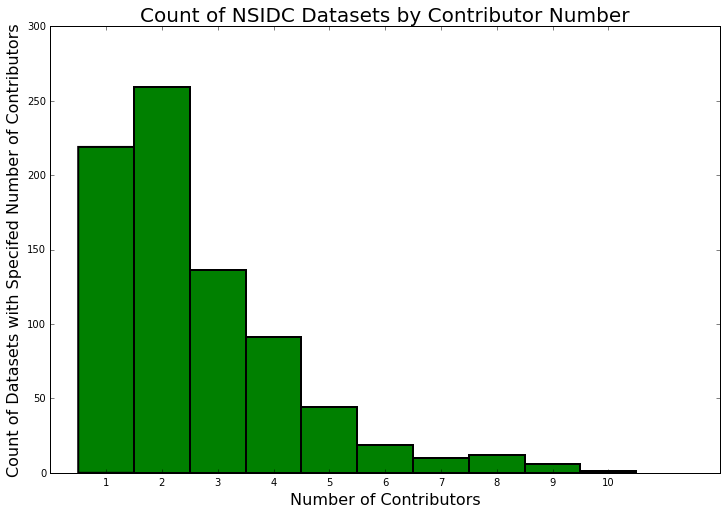

In [13]:
fig = plt.figure(figsize=(12,8))  # create a figure object
axes = fig.add_subplot(1, 1, 1)  # create an axes object in the figure


# Set bin size to 1
binwidth = 1
# Plot a histogram of count of contributors per dataset for the whole dataframe
plt.hist(nsidc_df['count_contributors'], bins=np.arange(min(nsidc_df['count_contributors']), 
                                                         max(nsidc_df['count_contributors'])+1 + binwidth, binwidth), 
         color='green', linewidth=2, align='left')
# set the x-axis tick marks
plt.xticks(np.arange(min(nsidc_df['count_contributors']), max(nsidc_df['count_contributors'])+1, 1.0))

# Add x-axis label
plt.xlabel('Number of Contributors', fontsize=16)
# Add y-axis label
plt.ylabel('Count of Datasets with Specifed Number of Contributors', fontsize=16)
# Add a plot title
plt.title('Count of NSIDC Datasets by Contributor Number', fontsize=20)
# Save plot as jpg
plt.savefig('Histogram_CountContributors.jpg')

In [14]:
# Describe count_data_formats column
nsidc_df.count_data_format.describe()

count    797.000000
mean       1.333752
std        0.873408
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: count_data_format, dtype: float64

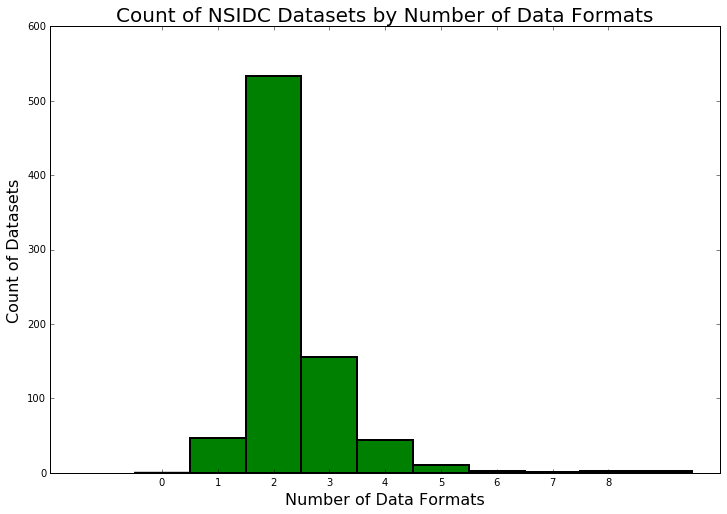

In [15]:
fig = plt.figure(figsize=(12,8))  # create a figure object
axes = fig.add_subplot(1, 1, 1)  # create an axes object in the figure


# Set bin size to 1
binwidth = 1
# Plot a histogram of count of data formats per dataset for the whole dataframe
plt.hist(nsidc_df['count_data_format'], bins=np.arange(min(nsidc_df['count_data_format']) -1, 
                                                         max(nsidc_df['count_data_format']) +1 + binwidth, binwidth), 
         color='green', linewidth=2, align='right')
# set the x-axis tick marks
plt.xticks(np.arange(min(nsidc_df['count_data_format']), max(nsidc_df['count_data_format'])+1, 1.0))
# Add x-axis label
plt.xlabel('Number of Data Formats', fontsize=16)
# Add y-axis label
plt.ylabel('Count of Datasets', fontsize=16)
# Add a plot title
plt.title('Count of NSIDC Datasets by Number of Data Formats', fontsize=20)
# Save plot as jpg
plt.savefig('Histogram_CountDataFormats.jpg')

In [16]:
# Describe count_platforms column
nsidc_df['count_platforms'].describe()

count    797.000000
mean       1.579674
std        1.690273
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       17.000000
Name: count_platforms, dtype: float64

In [17]:
# Describe count_sensors column
nsidc_df['count_sensors'].describe()

count    797.000000
mean       1.614806
std        1.915536
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       27.000000
Name: count_sensors, dtype: float64

In [18]:
# Describe version_clean column
nsidc_df['version_clean'].describe()

count    797.000000
mean       2.500627
std        6.182855
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       34.000000
Name: version_clean, dtype: float64

In [19]:
# Show the mean, std, min, max, coun of unique_users_ip for each value of count_data_format
nsidc_df.groupby('count_data_format')['unique_users_ip'].agg(['mean', 'std', 'min', 'max', 'count'])

,mean,std,min,max,count
count_data_format,,,,,
0,59.808511,92.925084,6,649,47
1,70.058161,134.948467,1,1461,533
2,159.205128,735.263198,1,5862,156
3,627.477273,3322.587304,3,22119,44
4,205.900000,398.435119,8,1235,10
5,153.000000,60.811183,110,196,2
6,14.000000,NaN,14,14,1
7,12374.500000,17073.093232,302,24447,2
8,128.500000,116.672619,46,211,2


In [20]:
# Show the mean, std, min, max, coun of unique_users_ip for each value of count_contributors
nsidc_df.groupby('count_contributors')['unique_users_ip'].agg(['mean', 'std', 'min', 'max', 'count'])

,mean,std,min,max,count
count_contributors,,,,,
1,98.242009,419.400501,4,5862,219
2,61.436293,110.961543,1,1235,259
3,98.279412,181.861595,3,1461,136
4,573.395604,3428.703937,3,24447,91
5,189.022727,841.880909,4,5629,44
6,114.210526,221.514880,7,992,19
7,40.100000,25.765826,11,90,10
8,108.250000,113.454136,15,433,12
9,800.666667,1825.307499,3,4526,6


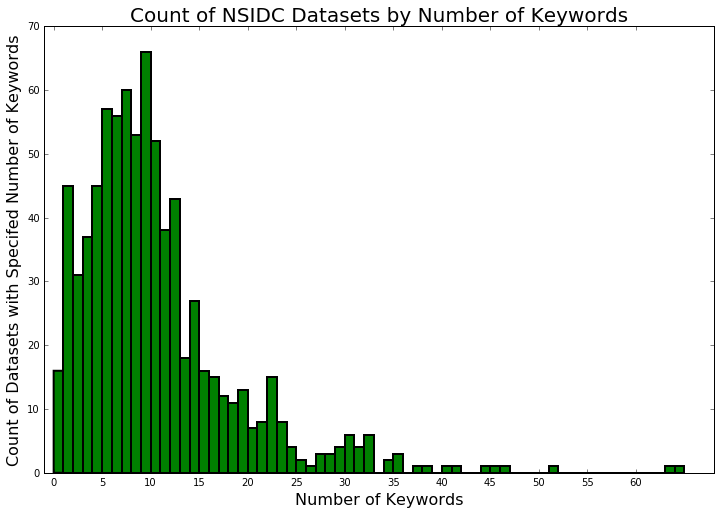

In [21]:
fig = plt.figure(figsize=(12,8))  # create a figure object
axes = fig.add_subplot(1, 1, 1)  # create an axes object in the figure


# Set bin size to 1
binwidth = 1
# Plot a histogram of count of keywords per dataset for the whole dataframe
plt.hist(nsidc_df['count_keyword'], bins=np.arange(min(nsidc_df['count_keyword']), 
                                                         max(nsidc_df['count_keyword']) +1 + binwidth, binwidth), 
         color='green', linewidth=2)
# set the x-axis tick marks
plt.xticks(np.arange(min(nsidc_df['count_keyword']), max(nsidc_df['count_keyword'])+1, 5.0))

# Set the x limit
plt.xlim([-1, 68])
# Add x-axis label
plt.xlabel('Number of Keywords', fontsize=16)
# Add y-axis label
plt.ylabel('Count of Datasets with Specifed Number of Keywords', fontsize=16)
# Add a plot title
plt.title('Count of NSIDC Datasets by Number of Keywords', fontsize=20)
# Save plot as jpg
plt.savefig('Histogram_CountKeywords.jpg')

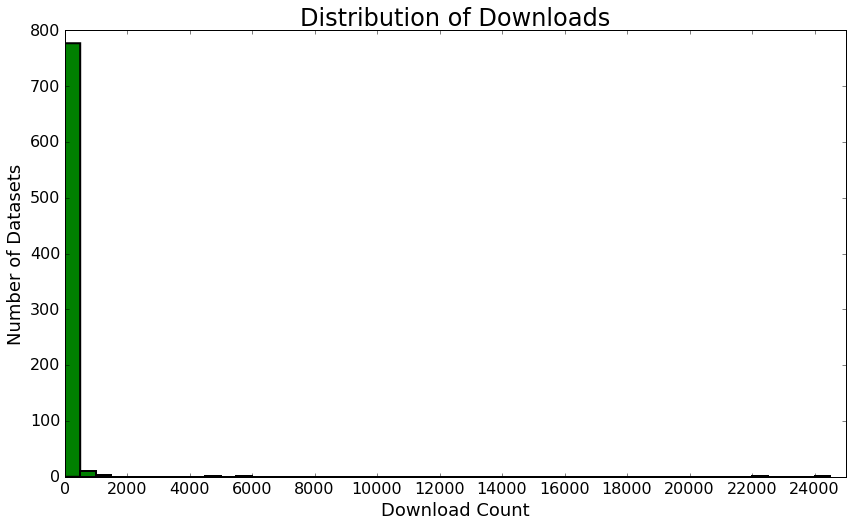

In [22]:
fig = plt.figure(figsize=(14,8))  # create a figure object
axes = fig.add_subplot(1, 1, 1)  # create an axes object in the figure

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
# Set bin size to 1
binwidth = 500
# Plot a histogram of count of keywords per dataset for the whole dataframe
plt.hist(nsidc_df.unique_users_ip, bins=np.arange(min(nsidc_df.unique_users_ip)-1, 
                                                         max(nsidc_df.unique_users_ip) +1 + binwidth, binwidth), 
         color='green', linewidth=2)
# set the x-axis tick marks
plt.xticks(np.arange(min(nsidc_df.unique_users_ip)-1, max(nsidc_df.unique_users_ip)+1, 2000.0))
# Set the x limit
#plt.xlim([-10, 800])
# Set the ylimit
#plt.ylim([-500, 25000])
# Add x-axis label
plt.xlabel('Download Count', fontsize=18)
# Add y-axis label
plt.ylabel('Number of Datasets', fontsize=18)
# Add a plot title
plt.title('Distribution of Downloads', fontsize=24)
# Save plot as jpg
plt.savefig('Hist_DownloadDistribution.jpg')

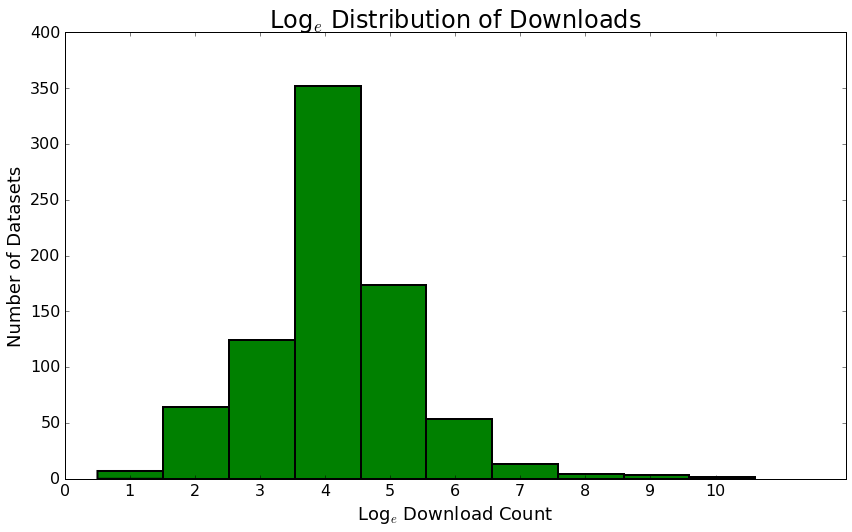

In [23]:
fig = plt.figure(figsize=(14,8))  # create a figure object
axes = fig.add_subplot(1, 1, 1)  # create an axes object in the figure

logcount = np.log(nsidc_df['unique_users_ip'])
# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
# Set bin size to 1
binwidth = 1
# Plot a histogram of count of keywords per dataset for the whole dataframe
plt.hist(logcount, color='green', linewidth=2, align='right')
# set the x-axis tick marks
plt.xticks(np.arange(0,11, 1))
# Set the x limit
#plt.xlim([-.2, 7])
# Set the ylimit
#plt.ylim([-1, 11])
# Add x-axis label
plt.xlabel(r'Log$_{e}$ Download Count', fontsize=18)
# Add y-axis label
plt.ylabel('Number of Datasets', fontsize=18)
# Add a plot title
plt.title(r'Log$_{e}$ Distribution of Downloads', fontsize=24)
# Save plot as jpg
plt.savefig('Hist_LogDownloadDistribution.jpg')

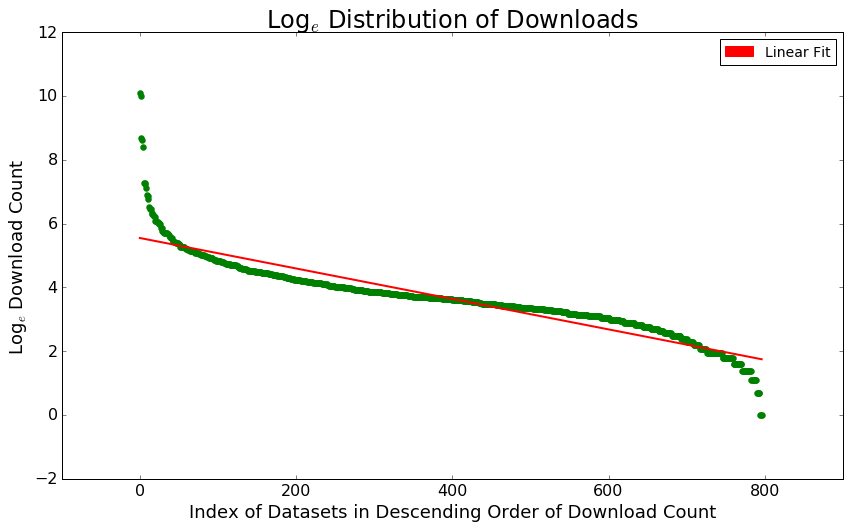

In [24]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(14,8))  # create a figure object
axes = fig.add_subplot(1, 1, 1)  # create an axes object in the figure

logcount = np.log(nsidc_df['unique_users_ip'])
# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)

plt.scatter(nsidc_df.index, logcount, color='green', linewidth=2)
fit = np.polyfit(nsidc_df.index, logcount, deg=1)
axes.plot(nsidc_df.index, fit[0] * nsidc_df.index + fit[1], color='red', linewidth=2)
# set the x-axis tick marks
#plt.xticks(np.arange(0,11, 1.0))
# Set the x limit
#plt.xlim([-.2, 7])
# Set the ylimit
#plt.ylim([-1, 11])
# Add x-axis label

plt.xlabel('Index of Datasets in Descending Order of Download Count', fontsize=18)
# Add y-axis label
plt.ylabel(r'Log$_e$ Download Count', fontsize=18)
# Add a plot title
plt.title(r'Log$_e$ Distribution of Downloads', fontsize=24)

red_patch = mpatches.Patch(color='red', label='Linear Fit')
plt.legend(handles=[red_patch], fontsize=14)

# Save plot as jpg
plt.savefig('Scatter_LogDownloadDistribution.jpg')

In [25]:
# Output column names
nsidc_df.columns

Index([u'dataset_id', u'unique_users_ip', u'scrape_date', u'scrape_time',
       u'version_clean', u'title_original', u'doi_address_clean',
       u'citation_date_clean', u'count_data_format', u'data_format_string',
       u'contributors_clean', u'contributor_list', u'contributor_last_names',
       u'count_contributors', u'spatial_coverage_clean',
       u'count_spatial_coverage', u'spatial_resolution_clean',
       u'count_spatial_resolution', u'platforms_clean', u'count_platforms',
       u'sensors_clean', u'count_sensors', u'update_frequency',
       u'location_clean', u'count_locations', u'keyword_clean',
       u'count_keyword', u'last_updated', u'count_page_ref',
       u'count_dataset_ref_out', u'dataset_ref_out', u'count_dataset_ref_in',
       u'dataset_ref_in'],
      dtype='object')

In [26]:
# Set seed for reproducibility
np.random.seed(4298)
# Split dataframe into test (20%) and train (80%)
nsidc_train, nsidc_test = train_test_split(nsidc_df, test_size = 0.20)

In [27]:
# Run linear regression with natural log of unique_users_ip as the dependent/target variable
nsidc_lr = smf.ols(formula=
                   'np.log(unique_users_ip) ~ -1 + count_data_format + count_contributors + count_platforms + count_sensors + count_spatial_coverage + count_spatial_resolution + count_locations + count_keyword',
                   data=nsidc_train).fit()
# Create an array of predictions for the training and testing data
nsidc_train_pred = nsidc_lr.predict(nsidc_train)
nsidc_test_pred = nsidc_lr.predict(nsidc_test)

In [28]:
# Output results of linear regression
nsidc_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(unique_users_ip)   R-squared:                       0.884
Model:                                 OLS   Adj. R-squared:                  0.882
Method:                      Least Squares   F-statistic:                     598.0
Date:                     Tue, 31 May 2016   Prob (F-statistic):          3.69e-288
Time:                             13:04:57   Log-Likelihood:                -1074.5
No. Observations:                      637   AIC:                             2165.
Df Residuals:                          629   BIC:                             2201.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
count_data_format            0.3693      0.058      6.345      0.000         0.255     0.484
count_contributors           0.2391      0.031      7.640      0.000         0.178     0.301
count_platforms              0.1894      0.036      5.223      0.000         0.118     0.261
count_sensors                0.0101      0.031      0.326      0.745        -0.051     0.071
count_spatial_coverage       1.0941      0.103     10.629      0.000         0.892     1.296
count_spatial_resolution     0.0269      0.097      0.277      0.782        -0.164     0.217
count_locations              0.1870      0.033      5.613      0.000         0.122     0.252
count_keyword                0.0350      0.007      5.019      0.000         0.021     0.049
==============================================================================
Omnibus:                       16.834   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.093
Skew:                          -0.113   Prob(JB):                     1.07e-07
Kurtosis:                       4.076   Cond. No.                         28.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
nsidc_lr.pvalues

count_data_format           4.242556e-10
count_contributors          8.105154e-14
count_platforms             2.392165e-07
count_sensors               7.445888e-01
count_spatial_coverage      2.212030e-24
count_spatial_resolution    7.818940e-01
count_locations             2.990326e-08
count_keyword               6.767895e-07
dtype: float64

In [30]:
# Calculate the RMSE of the testing actual (log10) values versus predicted values
np.sqrt(mean_squared_error(np.log(nsidc_test['unique_users_ip']), nsidc_test_pred))

1.4201439038840145

In [31]:
# Calculate the RMSE of the training actual (log10) values versus predicted values
np.sqrt(mean_squared_error(np.log(nsidc_train['unique_users_ip']), nsidc_train_pred))

1.3071885414525652

The above linear regression shows that count_sensors and count_spatial_resolution do not have a ststistically significant relationship to unique_users_ip. I will run a linear model without count_seonsors:

In [32]:
# Run linear regression with natural log of unique_users_ip as the dependent/target variable
nsidc_lr2 = smf.ols(formula=
                   'np.log(unique_users_ip) ~ -1 + count_data_format + count_contributors + count_platforms + count_spatial_coverage + count_spatial_resolution + count_locations + count_keyword',
                   data=nsidc_train).fit()
# Create an array of predictions for the training and testing data
nsidc_train_pred2 = nsidc_lr2.predict(nsidc_train)
nsidc_test_pred2 = nsidc_lr2.predict(nsidc_test)

In [33]:
# Output results of linear regression
nsidc_lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(unique_users_ip)   R-squared:                       0.884
Model:                                 OLS   Adj. R-squared:                  0.882
Method:                      Least Squares   F-statistic:                     684.4
Date:                     Tue, 31 May 2016   Prob (F-statistic):          1.43e-289
Time:                             13:04:57   Log-Likelihood:                -1074.6
No. Observations:                      637   AIC:                             2163.
Df Residuals:                          630   BIC:                             2194.
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
count_data_format            0.3693      0.058      6.351      0.000         0.255     0.484
count_contributors           0.2401      0.031      7.719      0.000         0.179     0.301
count_platforms              0.1947      0.032      6.005      0.000         0.131     0.258
count_spatial_coverage       1.0918      0.103     10.639      0.000         0.890     1.293
count_spatial_resolution     0.0245      0.097      0.253      0.800        -0.165     0.214
count_locations              0.1878      0.033      5.656      0.000         0.123     0.253
count_keyword                0.0356      0.007      5.326      0.000         0.022     0.049
==============================================================================
Omnibus:                       17.048   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.512
Skew:                          -0.117   Prob(JB):                     8.71e-08
Kurtosis:                       4.082   Cond. No.                         28.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
nsidc_lr2.pvalues

count_data_format           4.098764e-10
count_contributors          4.607525e-14
count_platforms             3.230500e-09
count_spatial_coverage      2.002456e-24
count_spatial_resolution    8.001529e-01
count_locations             2.345658e-08
count_keyword               1.400702e-07
dtype: float64

In [35]:
# Calculate the RMSE of the testing actual (log10) values versus predicted values
np.sqrt(mean_squared_error(np.log(nsidc_test['unique_users_ip']), nsidc_test_pred2))

1.4203701537881792

The RMSE of the test data was only slightly higher when removing count_sensors and the model is simpler. I will try removing count_spatial_resolution also:

In [36]:
# Run linear regression with natural log of unique_users_ip as the dependent/target variable
nsidc_lr3 = smf.ols(formula=
                   'np.log(unique_users_ip) ~ -1 + count_data_format + count_contributors + count_platforms + count_spatial_coverage + count_locations + count_keyword',
                   data=nsidc_train).fit()
# Create an array of predictions for the training and testing data
nsidc_train_pred3 = nsidc_lr3.predict(nsidc_train)
nsidc_test_pred3 = nsidc_lr3.predict(nsidc_test)

In [37]:
# Output results of linear regression
nsidc_lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(unique_users_ip)   R-squared:                       0.884
Model:                                 OLS   Adj. R-squared:                  0.883
Method:                      Least Squares   F-statistic:                     799.7
Date:                     Tue, 31 May 2016   Prob (F-statistic):          5.02e-291
Time:                             13:04:58   Log-Likelihood:                -1074.6
No. Observations:                      637   AIC:                             2161.
Df Residuals:                          631   BIC:                             2188.
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
count_data_format          0.3710      0.058      6.430      0.000         0.258     0.484
count_contributors         0.2417      0.030      7.937      0.000         0.182     0.302
count_platforms            0.1962      0.032      6.153      0.000         0.134     0.259
count_spatial_coverage     1.0958      0.101     10.812      0.000         0.897     1.295
count_locations            0.1864      0.033      5.697      0.000         0.122     0.251
count_keyword              0.0356      0.007      5.324      0.000         0.022     0.049
==============================================================================
Omnibus:                       17.142   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.946
Skew:                          -0.114   Prob(JB):                     7.01e-08
Kurtosis:                       4.091   Cond. No.                         26.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
nsidc_lr3.pvalues

count_data_format         2.517681e-10
count_contributors        9.482735e-15
count_platforms           1.349885e-09
count_spatial_coverage    4.114819e-25
count_locations           1.875876e-08
count_keyword             1.410781e-07
dtype: float64

In [39]:
# Calculate the RMSE of the testing actual (log10) values versus predicted values
np.sqrt(mean_squared_error(np.log(nsidc_test['unique_users_ip']), nsidc_test_pred3))

1.4208014385016889

The RMSE on the model above is still only slightly higher. This looks like a good linear model with a high adjusted R-squared and all features are statistically significant in their relationship to unique_users_ip.

In [40]:
# Run linear regression with natural log of unique_users_ip as the dependent/target variable
nsidc_lr4 = smf.ols(formula=
                   'np.log(unique_users_ip) ~ -1 + count_data_format + count_contributors + count_platforms + count_keyword + C(citation_date_clean)',
                   data=nsidc_train).fit()
# Create an array of predictions for the training and testing data
nsidc_train_pred4 = nsidc_lr4.predict(nsidc_train)
nsidc_test_pred4 = nsidc_lr4.predict(nsidc_test)

In [41]:
# Output results of linear regression
nsidc_lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(unique_users_ip)   R-squared:                       0.311
Model:                                 OLS   Adj. R-squared:                  0.277
Method:                      Least Squares   F-statistic:                     9.126
Date:                     Tue, 31 May 2016   Prob (F-statistic):           6.91e-33
Time:                             13:04:58   Log-Likelihood:                -894.11
No. Observations:                      637   AIC:                             1850.
Df Residuals:                          606   BIC:                             1988.
Df Model:                               30                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
C(citation_date_clean)[1983.0]     2.9411      0.721      4.077      0.000         1.524     4.358
C(citation_date_clean)[1984.0] -8.367e-14   1.56e-14     -5.378      0.000     -1.14e-13 -5.31e-14
C(citation_date_clean)[1988.0]     4.3765      1.016      4.308      0.000         2.381     6.372
C(citation_date_clean)[1991.0]     4.7402      1.011      4.687      0.000         2.754     6.726
C(citation_date_clean)[1992.0]     3.6468      0.589      6.193      0.000         2.490     4.803
C(citation_date_clean)[1994.0]     4.3283      1.023      4.232      0.000         2.320     6.337
C(citation_date_clean)[1995.0]     3.7574      0.360     10.427      0.000         3.050     4.465
C(citation_date_clean)[1996.0]     4.7225      0.732      6.452      0.000         3.285     6.160
C(citation_date_clean)[1997.0]     2.6259      0.421      6.239      0.000         1.799     3.453
C(citation_date_clean)[1998.0]     3.1623      0.180     17.525      0.000         2.808     3.517
C(citation_date_clean)[1999.0]     3.4871      0.333     10.485      0.000         2.834     4.140
C(citation_date_clean)[2000.0]     3.3666      0.426      7.901      0.000         2.530     4.203
C(citation_date_clean)[2001.0]     3.6542      0.394      9.275      0.000         2.880     4.428
C(citation_date_clean)[2002.0]     3.5891      0.224     16.015      0.000         3.149     4.029
C(citation_date_clean)[2003.0]     2.9141      0.155     18.796      0.000         2.610     3.219
C(citation_date_clean)[2004.0]     2.8958      0.180     16.050      0.000         2.541     3.250
C(citation_date_clean)[2005.0]     2.4589      0.291      8.451      0.000         1.887     3.030
C(citation_date_clean)[2006.0]     3.4886      0.224     15.581      0.000         3.049     3.928
C(citation_date_clean)[2007.0]     2.8078      0.238     11.789      0.000         2.340     3.276
C(citation_date_clean)[2008.0]     2.6982      0.230     11.707      0.000         2.246     3.151
C(citation_date_clean)[2009.0]     2.6167      0.174     15.080      0.000         2.276     2.957
C(citation_date_clean)[2010.0]     2.7180      0.201     13.547      0.000         2.324     3.112
C(citation_date_clean)[2011.0]     2.5990      0.227     11.470      0.000         2.154     3.044
C(citation_date_clean)[2012.0]     2.9447      0.292     10.092      0.000         2.372     3.518
C(citation_date_clean)[2013.0]     1.9419      0.173     11.235      0.000         1.602     2.281
C(citation_date_clean)[2014.0]     2.4009      0.173     13.853      0.000         2.061     2.741
C(citation_date_clean)[2015.0]     1.9928      0.160     12.460      0.000         1.679     2.307
C(citation_date_clean)[2016.0]     2.8574      0.283     1

In [42]:
nsidc_lr4.pvalues

C(citation_date_clean)[1983.0]    5.180690e-05
C(citation_date_clean)[1984.0]    1.079456e-07
C(citation_date_clean)[1988.0]    1.921379e-05
C(citation_date_clean)[1991.0]    3.428281e-06
C(citation_date_clean)[1992.0]    1.091676e-09
C(citation_date_clean)[1994.0]    2.675702e-05
C(citation_date_clean)[1995.0]    1.587840e-23
C(citation_date_clean)[1996.0]    2.254767e-10
C(citation_date_clean)[1997.0]    8.294835e-10
C(citation_date_clean)[1998.0]    6.210551e-56
C(citation_date_clean)[1999.0]    9.427533e-24
C(citation_date_clean)[2000.0]    1.309116e-14
C(citation_date_clean)[2001.0]    3.097338e-19
C(citation_date_clean)[2002.0]    2.124825e-48
C(citation_date_clean)[2003.0]    1.932465e-62
C(citation_date_clean)[2004.0]    1.435540e-48
C(citation_date_clean)[2005.0]    2.158359e-16
C(citation_date_clean)[2006.0]    2.790683e-46
C(citation_date_clean)[2007.0]    5.042582e-29
C(citation_date_clean)[2008.0]    1.103739e-28
C(citation_date_clean)[2009.0]    7.260191e-44
C(citation_da

In [43]:
# Calculate the RMSE of the testing actual (log10) values versus predicted values
np.sqrt(mean_squared_error(np.log(nsidc_test['unique_users_ip']), nsidc_test_pred4))

1.1221735062267086

Out of curiosity, I will create a dataframe that excludes datasets that are updated daily (because daily updates likely results in higher download rate).

In [44]:
# Drop any rows where udpate_frequency is daily
nsidc_dropdaily = nsidc_df.drop(nsidc_df[nsidc_df.update_frequency == 'daily'].index)

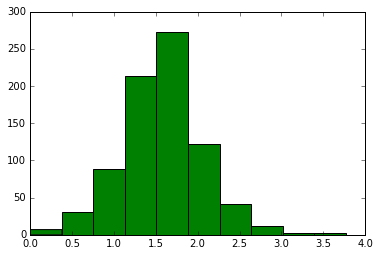

In [45]:
# Plot the histogram of log of the target variable in the new dataframe
plt.hist(np.log10(nsidc_dropdaily['unique_users_ip']), color='green')

plt.savefig('Histogram_DropDailyUniqueUsers.jpg')

In [46]:
cnt_dataformat = collections.Counter()
for word in nsidc_df['data_format_string']:
    cnt_dataformat[word] += 1

In [47]:
cnt_dataformat.most_common(10)

[(' txt  ', 240),
 (' binary  ', 68),
 (' microsoft-excel  ', 53),
 ('             not-specified          ', 47),
 (' hdf  ', 37),
 (' hdf-eos  ', 32),
 (' netcdf  ', 22),
 (' microsoft-excel txt  ', 21),
 (' hdf5  ', 18),
 (' geotiff  ', 15)]

In [48]:
cnt_sensors = collections.Counter()
for word in nsidc_df['sensors_clean']:
    cnt_sensors[word] += 1

In [49]:
cnt_sensors.most_common(10)

[('not specified', 131),
 ('cameras', 34),
 ('modis', 32),
 ('altimeters,glas', 30),
 ('amsr-e', 25),
 ('coring devices', 24),
 ('mass spectrometers', 14),
 ('aquarius_radiometer', 10),
 ('visual observations', 10),
 ('tm', 10)]

In [50]:
# Set seed for reproducibility
np.random.seed(6)
# Split dataframe into test (20%) and train (80%)
dropdaily_train, dropdaily_test = train_test_split(nsidc_df, test_size = 0.20)

In [51]:
# Run linear regression with natural log of unique_users_ip as the dependent/target variable
dropdaily_lr = smf.ols(formula=
                   'np.log10(unique_users_ip) ~ -1 + count_data_format + count_contributors + count_platforms + count_sensors + count_spatial_coverage + count_spatial_resolution + count_locations + count_keyword',
                   data=dropdaily_train).fit()
# Create an array of predictions for the training and testing data
dropdaily_train_pred = dropdaily_lr.predict(dropdaily_train)
dropdaily_test_pred = dropdaily_lr.predict(dropdaily_test)

In [52]:
# Output results of linear regression
dropdaily_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log10(unique_users_ip)   R-squared:                       0.882
Model:                                   OLS   Adj. R-squared:                  0.880
Method:                        Least Squares   F-statistic:                     585.2
Date:                       Tue, 31 May 2016   Prob (F-statistic):          1.54e-285
Time:                               13:04:59   Log-Likelihood:                -551.09
No. Observations:                        637   AIC:                             1118.
Df Residuals:                            629   BIC:                             1154.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
count_data_format            0.1803      0.027      6.618      0.000         0.127     0.234
count_contributors           0.0970      0.013      7.331      0.000         0.071     0.123
count_platforms              0.0627      0.016      3.858      0.000         0.031     0.095
count_sensors                0.0170      0.014      1.235      0.217        -0.010     0.044
count_spatial_coverage       0.4694      0.046     10.146      0.000         0.379     0.560
count_spatial_resolution     0.0329      0.043      0.768      0.443        -0.051     0.117
count_locations              0.0720      0.015      4.767      0.000         0.042     0.102
count_keyword                0.0163      0.003      5.366      0.000         0.010     0.022
==============================================================================
Omnibus:                       17.121   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.531
Skew:                          -0.216   Prob(JB):                     1.73e-06
Kurtosis:                       3.901   Cond. No.                         29.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Calculate the RMSE of the testing actual (log10) values versus predicted values
np.sqrt(mean_squared_error(np.log(dropdaily_test['unique_users_ip']), dropdaily_test_pred))

2.4361845165398974

In [54]:
# Recursive Feature Elimination


# Set y value equal to the natural lof of the unique_users_ip values in the training set
y = np.log(nsidc_train.unique_users_ip)
# Set the x value to selected columns from the training set
x = nsidc_train[['count_data_format', 'count_contributors', 'count_platforms', 'count_sensors', 
                 'count_spatial_coverage', 'count_spatial_resolution', 'count_locations', 'count_keyword']]

# create a linear regression model used to evaluate attributes
model = LinearRegression()
# create the RFE model and select the 3 strongest ttributes
rfe = RFE(model, 3)
# fit the model
rfe = rfe.fit(x, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False  True False False False]
[1 2 1 6 1 3 4 5]


In [55]:
# Run linear regression using the features recommended by the RFE model in above code chunk
nsidc_lr_rfe_3 = smf.ols(formula=
                   'np.log(unique_users_ip) ~ -1 + count_data_format + count_platforms + count_spatial_coverage',
                   data=nsidc_train).fit()
# Create an array of predictions for the training and testing data
nsidc_train_pred_rfe_3 = nsidc_lr_rfe_3.predict(nsidc_train)
nsidc_test_pred_rfe_3 = nsidc_lr_rfe_3.predict(nsidc_test)

In [56]:
nsidc_lr_rfe_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(unique_users_ip)   R-squared:                       0.852
Model:                                 OLS   Adj. R-squared:                  0.851
Method:                      Least Squares   F-statistic:                     1216.
Date:                     Tue, 31 May 2016   Prob (F-statistic):          2.06e-262
Time:                             13:04:59   Log-Likelihood:                -1151.7
No. Observations:                      637   AIC:                             2309.
Df Residuals:                          634   BIC:                             2323.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
count_data_format          0.5773      0.063      9.235      0.000         0.455     0.700
count_platforms            0.2248      0.036      6.282      0.000         0.155     0.295
count_spatial_coverage     1.9613      0.082     23.963      0.000         1.801     2.122
==============================================================================
Omnibus:                       73.952   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.516
Skew:                          -0.615   Prob(JB):                     1.41e-40
Kurtosis:                       5.324   Cond. No.                         4.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Calculate the RMSE of the testing actual values versus predicted values
np.sqrt(mean_squared_error(np.log(nsidc_test['unique_users_ip']), nsidc_test_pred_rfe_3))

1.5231409589026168

In [58]:
# Calculate the RMSE of the testing actual values versus predicted values
np.sqrt(mean_squared_error(np.log(nsidc_train['unique_users_ip']), nsidc_train_pred_rfe_3))

1.4756506790834407

In [59]:
# Code adapted from http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

#Data gets scaled automatically by sklearn's implementation
X = nsidc_train[['count_data_format', 'count_contributors', 'count_platforms', 'count_sensors', 
                 'count_spatial_coverage', 'count_spatial_resolution', 'count_locations', 'count_keyword']] 
Y = np.log(nsidc_train.unique_users_ip)
names = nsidc_train[['count_data_format', 'count_contributors', 'count_platforms', 'count_sensors', 
                 'count_spatial_coverage', 'count_spatial_resolution', 'count_locations', 'count_keyword']].columns
 
rlasso = RandomizedLasso()
rlasso.fit(X, Y)
 
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True)


Features sorted by their score:
[(1.0, 'count_platforms'), (1.0, 'count_keyword'), (0.975, 'count_data_format'), (0.95, 'count_contributors'), (0.935, 'count_locations'), (0.885, 'count_spatial_coverage'), (0.845, 'count_spatial_resolution'), (0.225, 'count_sensors')]


[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]
Optimal number of features : 8


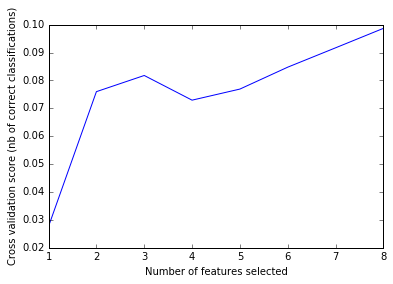

In [60]:
# Import RFECV

# Set y value equal to the natural lof of the unique_users_ip values in the training set
y = np.log(nsidc_train.unique_users_ip)
# Set the x value to selected columns from the training set
x = nsidc_train[['count_data_format', 'count_contributors', 'count_platforms', 'count_sensors', 
                 'count_spatial_coverage', 'count_spatial_resolution', 'count_locations', 'count_keyword']] 

# create a linear regression model to evaluate features
model = LinearRegression()
# create the RFECV model using 10-Fold cross validation
rfecv = RFECV(model, step=1, cv=10)
# fit the model
rfecv = rfecv.fit(x, y)
# summarize the selection of the attributes
print(rfecv.support_)
print(rfecv.ranking_)
# print the optimal number of features
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [61]:
# Code adapted from http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/


 
np.random.seed(19483)
 
size = 750
X = nsidc_train[['count_data_format', 'count_contributors', 'count_platforms', 'count_sensors', 
                 'count_spatial_coverage', 'count_spatial_resolution', 'count_locations', 'count_keyword']] 
 
#"Friedamn #1” regression problem
Y = np.log(nsidc_train.unique_users_ip)
 
names = ['dataformat', 'contributor', 'platforms', 'ctsensors', 'ctspatcov', 'ctspatres', 'location', 'keywords']
#nsidc_train[['count_data_format', 'count_contributors', 'count_platforms', 'count_sensors', 
                 #'count_spatial_coverage', 'count_spatial_resolution', 'count_locations', 'count_keyword']].columns
 
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["LinReg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge()
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
 
lasso = Lasso()
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
 
rlasso = RandomizedLasso()
rlasso.fit(X, Y)
ranks["Stabil"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr"] = rank_to_dict(f, names)
 

#ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
 
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t\t%s" % "\t".join(methods)
for name in names:
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))

		Corr	Lasso	LinReg	RF	RFE	Ridge	Stabil	Mean
dataformat	0.26	0.0	0.54	0.02	0.71	0.54	0.99	0.44
contributor	0.03	0.0	0.17	0.3	0.57	0.17	0.96	0.31
platforms	1.0	0.0	1.0	0.54	1.0	1.0	1.0	0.79
ctsensors	0.17	0.0	0.0	0.11	0.0	0.0	0.0	0.04
ctspatcov	0.06	0.0	0.51	0.0	0.86	0.51	0.84	0.4
ctspatres	0.11	0.0	0.32	0.2	0.43	0.31	0.71	0.3
location	0.0	0.0	0.17	0.26	0.29	0.17	0.92	0.26
keywords	0.27	1.0	0.01	1.0	0.14	0.01	1.0	0.49


In [62]:
ranks['Corr']

{'contributor': 0.03,
 'ctsensors': 0.17,
 'ctspatcov': 0.06,
 'ctspatres': 0.11,
 'dataformat': 0.26,
 'keywords': 0.27,
 'location': 0.0,
 'platforms': 1.0}

In [63]:


# Run linear regression that includes the categorical variable citation_date_clean
nsidc_lr5 = smf.ols(formula=
                   'np.log(unique_users_ip) ~ -1 + count_data_format + count_platforms + count_keyword + C(citation_date_clean)',
                   data=nsidc_train).fit()
# Create an array of predictions for the training and testing data
nsidc_train_pred4 = nsidc_lr4.predict(nsidc_train)
nsidc_test_pred4 = nsidc_lr4.predict(nsidc_test)

In [64]:
# Output results of linear regression
nsidc_lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(unique_users_ip)   R-squared:                       0.303
Model:                                 OLS   Adj. R-squared:                  0.270
Method:                      Least Squares   F-statistic:                     9.105
Date:                     Tue, 31 May 2016   Prob (F-statistic):           5.34e-32
Time:                             13:05:01   Log-Likelihood:                -897.82
No. Observations:                      637   AIC:                             1856.
Df Residuals:                          607   BIC:                             1989.
Df Model:                               29                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------
C(citation_date_clean)[1983.0]     3.0164      0.725      4.163      0.000         1.593     4.439
C(citation_date_clean)[1984.0] -1.174e-13   1.44e-14     -8.133      0.000     -1.46e-13 -8.91e-14
C(citation_date_clean)[1988.0]     4.5063      1.020      4.419      0.000         2.503     6.509
C(citation_date_clean)[1991.0]     4.8592      1.015      4.785      0.000         2.865     6.853
C(citation_date_clean)[1992.0]     3.8096      0.589      6.472      0.000         2.654     4.966
C(citation_date_clean)[1994.0]     4.4161      1.027      4.299      0.000         2.399     6.434
C(citation_date_clean)[1995.0]     3.8085      0.362     10.531      0.000         3.098     4.519
C(citation_date_clean)[1996.0]     5.0508      0.725      6.966      0.000         3.627     6.475
C(citation_date_clean)[1997.0]     2.7536      0.420      6.552      0.000         1.928     3.579
C(citation_date_clean)[1998.0]     3.3221      0.171     19.424      0.000         2.986     3.658
C(citation_date_clean)[1999.0]     3.5984      0.332     10.852      0.000         2.947     4.250
C(citation_date_clean)[2000.0]     3.4436      0.427      8.060      0.000         2.605     4.283
C(citation_date_clean)[2001.0]     3.7634      0.394      9.556      0.000         2.990     4.537
C(citation_date_clean)[2002.0]     3.7168      0.220     16.893      0.000         3.285     4.149
C(citation_date_clean)[2003.0]     3.0255      0.150     20.165      0.000         2.731     3.320
C(citation_date_clean)[2004.0]     3.0012      0.177     16.965      0.000         2.654     3.349
C(citation_date_clean)[2005.0]     2.6286      0.285      9.212      0.000         2.068     3.189
C(citation_date_clean)[2006.0]     3.6429      0.217     16.759      0.000         3.216     4.070
C(citation_date_clean)[2007.0]     2.9804      0.230     12.939      0.000         2.528     3.433
C(citation_date_clean)[2008.0]     2.8407      0.225     12.609      0.000         2.398     3.283
C(citation_date_clean)[2009.0]     2.7713      0.164     16.862      0.000         2.448     3.094
C(citation_date_clean)[2010.0]     2.8538      0.195     14.634      0.000         2.471     3.237
C(citation_date_clean)[2011.0]     2.8445      0.208     13.674      0.000         2.436     3.253
C(citation_date_clean)[2012.0]     3.1152      0.286     10.888      0.000         2.553     3.677
C(citation_date_clean)[2013.0]     2.1100      0.162     13.046      0.000         1.792     2.428
C(citation_date_clean)[2014.0]     2.5760      0.161     15.983      0.000         2.259     2.893
C(citation_date_clean)[2015.0]     2.1505      0.149     14.402      0.000         1.857     2.444
C(citation_date_clean)[2016.0]     3.2034      0.252     1

In [65]:
# Calculate the RMSE of the testing actual values versus predicted values
np.sqrt(mean_squared_error(np.log(nsidc_test['unique_users_ip']), nsidc_test_pred4))

1.1221735062267086

In [66]:
data_format_bin = pd.read_csv('data_format_as_binaries_2016-05-21_1426.csv')

In [67]:
# Set seed for reproducibility
np.random.seed(4298)
# Split dataframe into test (34%) and train (66%)
data_format_train, data_format_test = train_test_split(data_format_bin, test_size = 0.20)

In [68]:
X = data_format_train.iloc[0:,2:]
y = np.log10(data_format_train.unique_users_ip)

X_test = data_format_test.iloc[0:,2:]
y_test = np.log(data_format_test.unique_users_ip)

estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10)
estimator.fit(X, y)
y_predict = estimator.predict(X_test)

score = np.sqrt(mean_squared_error(y_test, y_predict))
print score
print "Features sorted by their importance:"
print sorted(zip(map(lambda x: round(x, 4), estimator.feature_importances_), 
                 data_format_train.iloc[0:,2:].columns), reverse=True)

2.37929120529
Features sorted by their importance:
[(0.3107, 'png'), (0.2581, 'hdf-eos'), (0.1138, 'esri-shapefile'), (0.1025, 'microsoft-excel'), (0.0921, 'hdf'), (0.0742, 'binary'), (0.0486, 'geotiff'), (0.0, 'xml'), (0.0, 'wms'), (0.0, 'wfs'), (0.0, 'txt'), (0.0, 'twf'), (0.0, 'tiff'), (0.0, 'sir'), (0.0, 'segy'), (0.0, 'photoshop'), (0.0, 'pdf'), (0.0, 'paper'), (0.0, 'not-specified'), (0.0, 'netcdf'), (0.0, 'mpeg'), (0.0, 'microsoft-word'), (0.0, 'microsoft-access'), (0.0, 'matlab'), (0.0, 'lmrf'), (0.0, 'kml'), (0.0, 'jpeg'), (0.0, 'irl'), (0.0, 'img'), (0.0, 'html'), (0.0, 'hdf5'), (0.0, 'grib'), (0.0, 'gmt'), (0.0, 'gml'), (0.0, 'gif'), (0.0, 'evf'), (0.0, 'esri-interchange'), (0.0, 'esri-grid'), (0.0, 'dxf'), (0.0, 'csv'), (0.0, 'bmp'), (0.0, 'avi'), (0.0, 'arcgis')]


In [69]:

# Function adapted from http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
def visualize_tree(tree, feature_names, filename):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open(filename+".dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["/usr/local/Cellar/graphviz/2.38.0/bin/dot", "-Tpng", filename+".dot", "-o", filename+".png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to produce visualization")

In [70]:
data_format_features = data_format_train.iloc[0:,2:].columns

visualize_tree(estimator, data_format_features, 'd_f_tree10')

In [71]:
keyword_bin = pd.read_csv('keyword_as_binaries_2016-05-21_1427.csv')

In [72]:
# Set seed for reproducibility
np.random.seed(521)
# Split dataframe into test (34%) and train (66%)
keyword_train, keyword_test = train_test_split(keyword_bin, test_size = 0.20)

In [73]:
X = keyword_train.iloc[0:,2:]
y = np.log(keyword_train.unique_users_ip)

X_test = keyword_test.iloc[0:,2:]
y_test = np.log(keyword_test.unique_users_ip)

keyword_estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10)
keyword_estimator.fit(X, y)
y_predict = keyword_estimator.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print rmse
print "Features sorted by their importance:"
print sorted(zip(map(lambda x: round(x, 4), keyword_estimator.feature_importances_), 
                 keyword_train.iloc[0:,2:].columns), reverse=True)[0:20]

1.14347342772
Features sorted by their importance:
[(0.2948, 'sea ice pm polar stereo-project'), (0.1408, 'agdc-project'), (0.1112, 'ease-grid-project'), (0.0899, 'sea ice'), (0.0842, 'numerical weather prediction'), (0.0813, 'glacier fluctuation'), (0.0767, 'modis-project'), (0.0625, 'smex'), (0.0586, 'smap validation cl07-project'), (0.0, 'zonal winds'), (0.0, 'xenon'), (0.0, 'xctd probes'), (0.0, 'worthington glacier'), (0.0, 'world meteorological organization'), (0.0, 'wolverine glacier'), (0.0, 'wmo'), (0.0, 'winter air temperature'), (0.0, 'wind-induced undercatch'), (0.0, 'wind velocity as vectors'), (0.0, 'wind velocity')]


In [74]:
keyword_features = keyword_train.iloc[0:,2:].columns
visualize_tree(keyword_estimator, keyword_features, 'keyword_tree10')

In [75]:
# Code adapted from http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/
#Data gets scaled automatically by sklearn's implementation
X = keyword_train.iloc[0:,2:]
Y = np.log(keyword_train.unique_users_ip)
names = keyword_train.iloc[0:,2:].columns
 
rlasso = RandomizedLasso()
rlasso.fit(X, Y)
 
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True)[0:20]




/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 40 iterations, i.e. alpha=3.717e-03, with an active set of 36 regressors, and the smallest cholesky pivot element being 4.712e-08
  ConvergenceWarning)
/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 48 iterations, i.e. alpha=3.334e-03, with an active set of 44 regressors, and the smallest cholesky pivot element being 8.093e-08
  ConvergenceWarning)
/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 54 iterations, i.e. alpha=3.030e-03, with an active set of 50 regressors, and the smallest cholesky pivot element being 4.712e-08
  ConvergenceWarning)
/Users/Pen

Features sorted by their score:
[(0.2, 'sea ice pm polar stereo-project'), (0.115, 'polar stereo sea ice-project '), (0.055, 'sea ice prediction network-project'), (0.005, 'sea ice pm trends-project'), (0.005, 'sea ice conditions'), (0.0, 'zonal winds'), (0.0, 'xenon'), (0.0, 'xctd probes'), (0.0, 'worthington glacier'), (0.0, 'world meteorological organization'), (0.0, 'wolverine glacier'), (0.0, 'wmo'), (0.0, 'winter air temperature'), (0.0, 'wind-induced undercatch'), (0.0, 'wind velocity as vectors'), (0.0, 'wind velocity'), (0.0, 'wind speed'), (0.0, 'wind direction'), (0.0, 'whillans ice stream'), (0.0, 'wetlands')]


/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 221 iterations, i.e. alpha=1.010e-03, with an active set of 203 regressors, and the smallest cholesky pivot element being 6.664e-08
  ConvergenceWarning)
/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 221 iterations, i.e. alpha=1.010e-03, with an active set of 203 regressors, and the smallest cholesky pivot element being 7.885e-08
  ConvergenceWarning)
/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 223 iterations, i.e. alpha=9.869e-04, with an active set of 205 regressors, and the smallest cholesky pivot element being 5.162e-08
  ConvergenceWarning)
/Use

In [76]:

X = keyword_train.iloc[0:,2:]
Y = np.log(keyword_train.unique_users_ip)
names = keyword_train.iloc[0:,2:].columns
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))[0:20]

Features sorted by their rank:
[(1.0, 'active-layer depth'), (2.0, 'palsa bog'), (3.0, 'runways'), (4.0, 'amm-1'), (5.0, 'adeos-ii'), (6.0, 'amsr-project'), (7.0, 'chugach mountains'), (8.0, 'columbia glacier'), (9.0, 'atlantic ocean'), (10.0, 'ocean water temperatures'), (11.0, 'u.s. navy'), (12.0, 'aleutian islands'), (13.0, 'bering strait'), (14.0, 'msa'), (15.0, 'chromatography'), (16.0, 'carbon-13'), (17.0, 'firn air chemistry'), (18.0, 'drifting ice'), (19.0, 'surface drifting buoy'), (20.0, 'ice buoy')]


In [77]:
contributor_bin = pd.read_csv('contributor_list_as_binaries_2016-05-21_1426.csv')

In [78]:
# Set seed for reproducibility
np.random.seed(521)
# Split dataframe into test (34%) and train (66%)
contr_train, contr_test = train_test_split(contributor_bin, test_size = 0.20)

In [79]:
X = contr_train.iloc[0:,2:]
y = np.log(contr_train.unique_users_ip)

X_test = contr_test.iloc[0:,2:]
y_test = np.log(contr_test.unique_users_ip)

contributor_estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10)
contributor_estimator.fit(X, y)
y_predict = contributor_estimator.predict(X_test)

score = np.sqrt(mean_squared_error(y_test, y_predict))
score

1.2314097672260205

In [80]:
contributor_features = contr_train.iloc[0:,2:].columns
visualize_tree(contributor_estimator, contributor_features, 'contributor_tree10')

In [81]:
# Code adapted from http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

X = contr_train.iloc[0:,2:]
Y = np.log(contr_train.unique_users_ip)
names = contr_train.iloc[0:,2:].columns
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))[0:40]

Features sorted by their rank:
[(1.0, 'A'), (2.0, 'Colliander'), (3.0, 'A-Kliskey'), (4.0, 'L-Alessa'), (5.0, 'A-Andrews'), (6.0, 'M-Markowski'), (7.0, 'A-Alfimov'), (8.0, 'D-Berman'), (9.0, 'C-Kluever'), (10.0, 'B-Haines'), (11.0, 'E-Podest'), (12.0, 'A-Colliander'), (13.0, 'A-Berg'), (14.0, 'McNairn'), (15.0, 'G-Wiseman'), (16.0, 'M-Moghaddam'), (17.0, 'S'), (18.0, 'Yueh'), (19.0, 'E-Molkentin'), (20.0, 'E-Nadyozhina'), (21.0, 'D-Drozdov'), (22.0, 'G-Malkova'), (23.0, 'J-Bufton'), (24.0, 'J-Spinhirne'), (25.0, 'D-Hlavka'), (26.0, 'C-Shuman'), (27.0, 'D-Yi'), (28.0, 'R-Schutz'), (29.0, 'H-Zwally'), (30.0, 'A-Brenner'), (31.0, 'C-Parkinson'), (32.0, 'H'), (33.0, 'M-Temimi'), (34.0, 'R-Khanbilvardi'), (35.0, 'S-Hodge'), (36.0, 'R-Bell'), (37.0, 'K-Tinto'), (38.0, 'K-Hinkel'), (39.0, 'F-Nelson'), (40.0, 'M-Clark')]


In [82]:
location_bin = pd.read_csv('location_as_binaries_2016-05-21_1427.csv')

In [83]:
# Set seed for reproducibility
np.random.seed(1896)
# Split dataframe into test (34%) and train (66%)
location_train, location_test = train_test_split(location_bin, test_size = 0.20)

In [84]:
X = location_train.iloc[0:,2:]
y = np.log(location_train.unique_users_ip)

X_test = location_test.iloc[0:,2:]
y_test = np.log(location_test.unique_users_ip)

location_estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10)
location_estimator.fit(X, y)
y_predict = location_estimator.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print rmse
print "Features sorted by their importance:"
print sorted(zip(map(lambda x: round(x, 4), location_estimator.feature_importances_), 
                 location_train.iloc[0:,2:].columns), reverse=True)[0:20]

1.18963076093
Features sorted by their importance:
[(0.2009, 'baltic sea'), (0.1697, 'oklahoma'), (0.1207, 'new zealand'), (0.0955, 'georgia'), (0.0879, 'bering sea'), (0.0873, 'antarctica'), (0.0838, 'arctic'), (0.0775, 'mexico'), (0.0768, 'maryland'), (0.0, 'western europe'), (0.0, 'western asia'), (0.0, 'weddell sea'), (0.0, 'uzbekistan'), (0.0, 'united states of america'), (0.0, 'turkmenistan'), (0.0, 'troposphere'), (0.0, 'texas'), (0.0, 'tennessee'), (0.0, 'tajikistan'), (0.0, 'switzerland')]


In [85]:
location_features = location_train.iloc[0:,2:].columns
visualize_tree(location_estimator, location_features, 'location_tree10')

In [86]:
sensors_bin = pd.read_csv('sensors_as_binaries_2016-05-21_1427.csv')

In [87]:
# Set seed for reproducibility
np.random.seed(19)
# Split dataframe into test (34%) and train (66%)
sensors_train, sensors_test = train_test_split(sensors_bin, test_size = 0.20)

In [88]:
X = sensors_train.iloc[0:,2:]
y = np.log(sensors_train.unique_users_ip)

X_test = sensors_test.iloc[0:,2:]
y_test = np.log(sensors_test.unique_users_ip)

sensors_estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10)
sensors_estimator.fit(X, y)
y_predict = sensors_estimator.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print rmse
print "Features sorted by their importance:"
print sorted(zip(map(lambda x: round(x, 4), sensors_estimator.feature_importances_), 
                 sensors_train.iloc[0:,2:].columns), reverse=True)[0:20]

1.02066058924
Features sorted by their importance:
[(0.3632, 'ssm/i'), (0.147, 'modis'), (0.107, 'dslr'), (0.0959, 'thir'), (0.0887, 'amsu-a'), (0.0788, 'smmr'), (0.0481, 'ssmis'), (0.0365, 'pals'), (0.0346, 'amsr-e'), (0.0, 'zls'), (0.0, 'xbt'), (0.0, 'wise'), (0.0, 'wind vanes'), (0.0, 'wind profilers'), (0.0, 'wet/dry precipitation samplers'), (0.0, 'wet bulb thermometers'), (0.0, 'wave height gauges'), (0.0, 'water bottles'), (0.0, 'vtpr'), (0.0, 'vtir')]


In [89]:
sensors_features = sensors_train.iloc[0:,2:].columns
visualize_tree(sensors_estimator, sensors_features, 'sensors_tree10')

In [90]:
# Code adapted from http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

#Data gets scaled automatically by sklearn's implementation
X = sensors_train.iloc[0:,2:]
Y = np.log(sensors_train.unique_users_ip)
names = sensors_train.iloc[0:,2:].columns
 
rlasso = RandomizedLasso()
rlasso.fit(X, Y)
 
print "Features sorted by their score:"
print sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True)[0:40]

Features sorted by their score:
[(1.0, 'smmr'), (1.0, 'modis'), (0.975, 'thir'), (0.97, 'dslr'), (0.96, 'ssmis'), (0.905, 'amsr-e'), (0.89, 'palsar'), (0.89, 'pals'), (0.87, 'awifs'), (0.79, 'mass spectrometers'), (0.78, 'zls'), (0.77, 'conus-soil'), (0.74, 'optical dust loggers'), (0.715, 'quickbird/bhrc-60'), (0.71, 'la-icp-ms'), (0.695, 'not specified'), (0.685, 'seismographs'), (0.685, 'sar'), (0.675, 'amsu-b'), (0.66, 'lidar'), (0.635, 'ssm/i'), (0.635, 'slar'), (0.635, 'sigma space lidar'), (0.63, 'lvis-gh'), (0.6, 'gas chromatographs'), (0.585, 'thermometers'), (0.585, 'esmr'), (0.57, 'visual observations'), (0.55, 'steel measuring tape'), (0.5, 'echo sounders'), (0.49, 'vegetation-1'), (0.47, 'tm'), (0.455, 'soil heat probe'), (0.435, 'radar'), (0.42, 'smap l-band radiometer '), (0.42, 'amsu-a'), (0.41, 'ra'), (0.4, 'tovs'), (0.4, 'scatterometers'), (0.385, 'smap l-band radiometer')]


/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=8.348e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=3.509e-03, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16
  ConvergenceWarning)
/Users/Penguin/anaconda/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 32 iterations, i.e. alpha=2.584e-03, with an active set of 32 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
/Users/Pengu

In [91]:
# Code adapted from http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/

X = sensors_train.iloc[0:,2:]
Y = np.log(sensors_train.unique_users_ip)
names = sensors_train.iloc[0:,2:].columns
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names))[0:40]

Features sorted by their rank:
[(1.0, 'accelerometers'), (2.0, 'transponders'), (3.0, 'pressure gauges'), (4.0, 'ice stress sensors'), (5.0, 'bathyphotometer'), (6.0, 'hydrophones'), (7.0, 'geophones'), (8.0, 'std'), (9.0, 'psychrometers'), (10.0, 'aneroid pressure sensor'), (11.0, 'acords'), (12.0, 'mcrds'), (13.0, 'avhrr-2'), (14.0, 'hrs'), (15.0, 'ctd'), (16.0, 'niskin bottles'), (17.0, 'amsu-b'), (18.0, 'ascat'), (19.0, 'seviri'), (20.0, 'par sensors'), (21.0, 'aers'), (22.0, 'icords'), (23.0, 'licor quantum sensor'), (24.0, 'wind vanes'), (25.0, 'ultrasonic depth gauge'), (26.0, 'side-scan sonar'), (27.0, 'ssu'), (28.0, 'bathythermographs'), (29.0, 'xbt'), (30.0, 'wet bulb thermometers'), (31.0, 'dry bulb thermometers'), (32.0, 'vtpr'), (33.0, 'wave height gauges'), (34.0, 'sirs'), (35.0, 'msu'), (36.0, 'sounders'), (37.0, 'smap l-band radiometer '), (38.0, 'viirs'), (39.0, 'sediment traps'), (40.0, 'electron microprobes')]


In [92]:
platform_bin = pd.read_csv('platforms_as_binaries_2016-05-25_0845.csv')

In [93]:
# Set seed for reproducibility
np.random.seed(497)
# Split dataframe into test (20%) and train (80%)
platform_train, platform_test = train_test_split(platform_bin, test_size = 0.20)

In [94]:
X = platform_train.iloc[0:,2:]
y = np.log(platform_train.unique_users_ip)

X_test = platform_test.iloc[0:,2:]
y_test = np.log(platform_test.unique_users_ip)

platform_estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10)
platform_estimator.fit(X, y)
y_predict = platform_estimator.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print rmse
print "Features sorted by their importance:"
print sorted(zip(map(lambda x: round(x, 4), platform_estimator.feature_importances_), 
                 platform_train.iloc[0:,2:].columns), reverse=True)[0:20]

1.13639610881
Features sorted by their importance:
[(0.3128, 'dmsp 5d-3/f17'), (0.1641, 'goes'), (0.1299, 'terra'), (0.1014, 'aqua'), (0.0882, 'satellites'), (0.0791, 'nimbus-4'), (0.0759, 'dmsp 5d-2/f13'), (0.0485, 'radarsat-1'), (0.0, 'weather stations'), (0.0, 'tsx'), (0.0, 'suomi-npp'), (0.0, 'submarine'), (0.0, 'spot-5'), (0.0, 'spot-4'), (0.0, 'spot-3'), (0.0, 'spot-2'), (0.0, 'spot-1'), (0.0, 'smap observatory '), (0.0, 'smap observatory'), (0.0, 'ships')]


In [95]:
platform_features = platform_train.iloc[0:,2:].columns
visualize_tree(platform_estimator, platform_features, 'platforms_tree10')

In [96]:
master_dummy = pd.concat([data_format_bin, keyword_bin.iloc[0:,2:], location_bin.iloc[0:,2:], 
                          sensors_bin.iloc[0:,2:], platform_bin.iloc[0:,2:]], axis=1)

In [97]:
master_dummy.shape

(797, 2077)

In [98]:
master_dummy.to_csv('master_dummy_dataframe.csv', index=False, encoding='utf-8')

In [99]:
# Set seed for reproducibility
np.random.seed(8)
# Split dataframe into test (20%) and train (80%)
master_train, master_test = train_test_split(master_dummy, test_size = 0.20)

In [100]:
X = master_train.iloc[0:,2:]
y = np.log(master_train.unique_users_ip)

X_test = master_test.iloc[0:,2:]
y_test = np.log(master_test.unique_users_ip)

master_estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10)
master_estimator.fit(X, y)
y_predict = master_estimator.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print rmse
print "Features sorted by their importance:"
print sorted(zip(map(lambda x: round(x, 4), master_estimator.feature_importances_), 
                 master_train.iloc[0:,2:].columns), reverse=True)[0:40]

0.977652043834
Features sorted by their importance:
[(0.2776, 'sea ice pm polar stereo-project'), (0.1438, 'hdf-eos'), (0.1157, 'dmsp 5d-3/f17'), (0.1056, 'thir'), (0.0951, 'agdc-project'), (0.0918, 'png'), (0.0663, 'new zealand'), (0.0627, 'oklahoma'), (0.0415, 'satellites'), (0.0, 'zonal winds'), (0.0, 'zls'), (0.0, 'xml'), (0.0, 'xenon'), (0.0, 'xctd probes'), (0.0, 'xbt'), (0.0, 'worthington glacier'), (0.0, 'world meteorological organization'), (0.0, 'wolverine glacier'), (0.0, 'wms'), (0.0, 'wmo'), (0.0, 'wise'), (0.0, 'winter air temperature'), (0.0, 'wind-induced undercatch'), (0.0, 'wind velocity as vectors'), (0.0, 'wind velocity'), (0.0, 'wind vanes'), (0.0, 'wind speed'), (0.0, 'wind profilers'), (0.0, 'wind direction'), (0.0, 'whillans ice stream'), (0.0, 'wfs'), (0.0, 'wetlands'), (0.0, 'wet/dry precipitation samplers'), (0.0, 'wet bulb thermometers'), (0.0, 'western europe'), (0.0, 'western divide core'), (0.0, 'western asia'), (0.0, 'western aleut/unangan'), (0.0, 'west

In [101]:
master_features = master_train.iloc[0:,2:].columns
visualize_tree(master_estimator, master_features, 'master_tree10')

In [102]:
master_and_counts = pd.concat([master_dummy, nsidc_df[['count_data_format', 'count_contributors', 
                                                       'count_platforms', 'count_sensors', 'count_spatial_coverage', 
                                                       'count_spatial_resolution', 'count_locations', 'count_keyword']]], axis = 1)

In [103]:
master_and_counts.to_csv('master_dummies_and_counts.csv', index=False, encoding='utf-8')

In [104]:
# Set seed for reproducibility
np.random.seed(8)
# Split dataframe into test (20%) and train (80%)
master_and_counts_train, master_and_counts_test = train_test_split(master_and_counts, test_size = 0.20)

In [105]:
X = master_and_counts_train.iloc[0:,2:]
y = np.log(master_and_counts_train.unique_users_ip)

X_test = master_and_counts_test.iloc[0:,2:]
y_test = np.log(master_and_counts_test.unique_users_ip)

master_and_counts_estimator = DecisionTreeRegressor(criterion='mse', max_leaf_nodes=10)
master_and_counts_estimator.fit(X, y)
y_predict = master_and_counts_estimator.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print rmse
print "Features sorted by their importance:"
print sorted(zip(map(lambda x: round(x, 4), master_and_counts_estimator.feature_importances_), 
                 master_and_counts_train.iloc[0:,2:].columns), reverse=True)[0:40]

1.00975824797
Features sorted by their importance:
[(0.2708, 'sea ice pm polar stereo-project'), (0.1405, 'count_platforms'), (0.1402, 'hdf-eos'), (0.099, 'thir'), (0.0895, 'png'), (0.088, 'agdc-project'), (0.066, 'new zealand'), (0.0615, 'oklahoma'), (0.0445, 'dmsp 5d-3/f17'), (0.0, 'zonal winds'), (0.0, 'zls'), (0.0, 'xml'), (0.0, 'xenon'), (0.0, 'xctd probes'), (0.0, 'xbt'), (0.0, 'worthington glacier'), (0.0, 'world meteorological organization'), (0.0, 'wolverine glacier'), (0.0, 'wms'), (0.0, 'wmo'), (0.0, 'wise'), (0.0, 'winter air temperature'), (0.0, 'wind-induced undercatch'), (0.0, 'wind velocity as vectors'), (0.0, 'wind velocity'), (0.0, 'wind vanes'), (0.0, 'wind speed'), (0.0, 'wind profilers'), (0.0, 'wind direction'), (0.0, 'whillans ice stream'), (0.0, 'wfs'), (0.0, 'wetlands'), (0.0, 'wet/dry precipitation samplers'), (0.0, 'wet bulb thermometers'), (0.0, 'western europe'), (0.0, 'western divide core'), (0.0, 'western asia'), (0.0, 'western aleut/unangan'), (0.0, 'wes

In [106]:
master_and_counts_features = master_and_counts_train.iloc[0:,2:].columns
visualize_tree(master_and_counts_estimator, master_and_counts_features, 'master_and_counts_tree10')

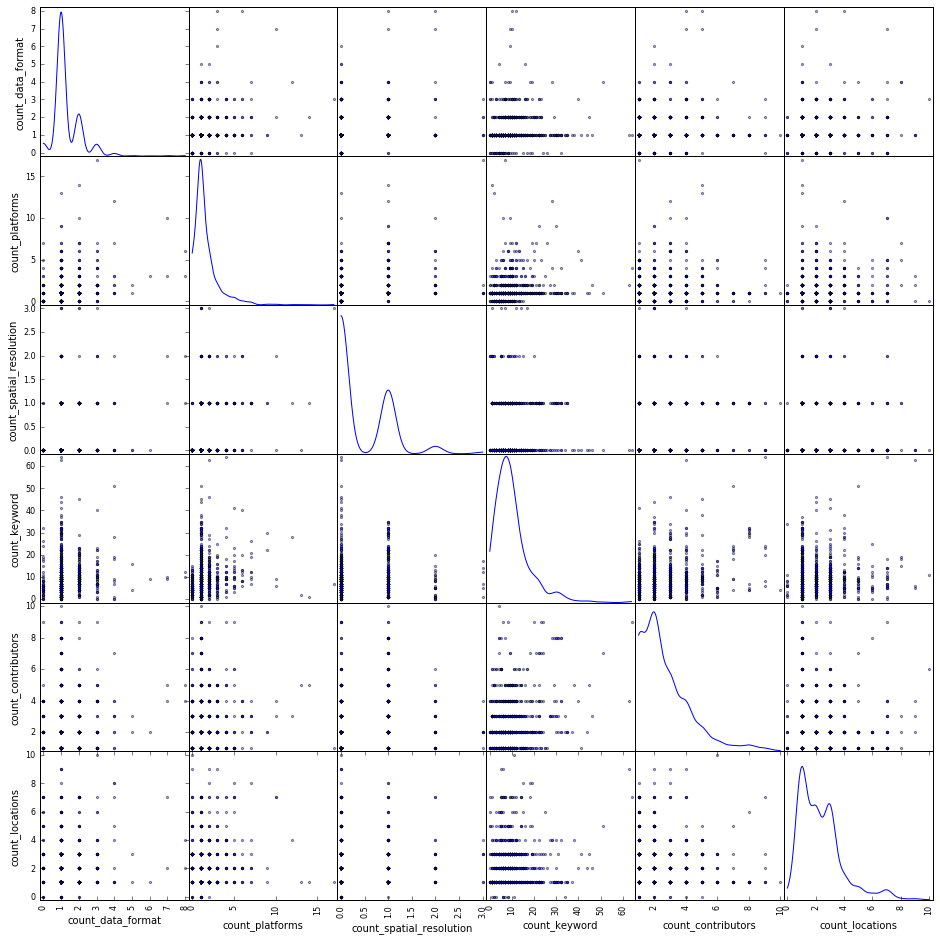

In [107]:

scatter_matrix(nsidc_df[['count_data_format', 'count_platforms', 'count_spatial_resolution', 'count_keyword', 'count_contributors', 'count_locations']], alpha=0.4, figsize=(16, 16), diagonal='kde')
# Save plot as jpg
plt.savefig('ScatterPlotMatrix.jpg')

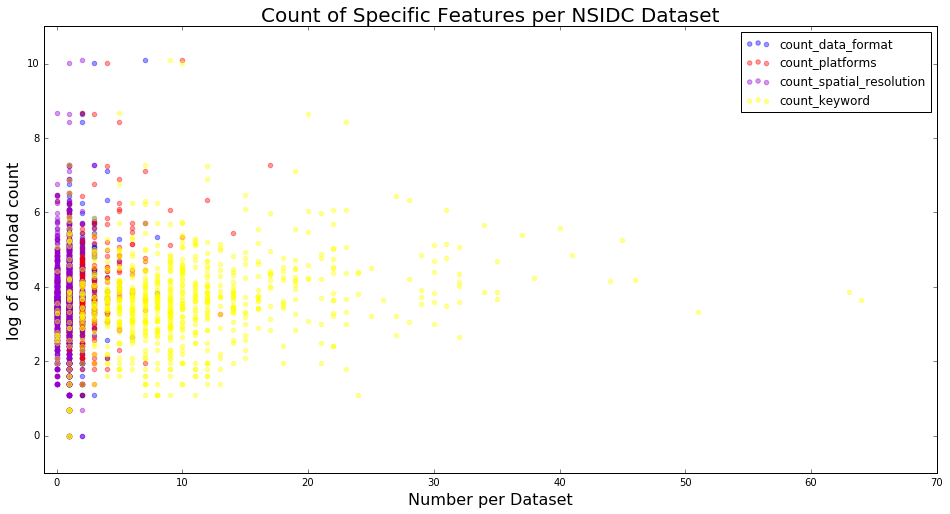

In [108]:
fig = plt.figure(figsize=(16,8))  # create a figure object
axes = fig.add_subplot(1, 1, 1)  # create an axes object in the figure


# Set bin size to 1
binwidth = 1
# Plot a histogram of citation dates for the whole dataframe
plt.scatter(nsidc_df['count_data_format'], np.log(nsidc_df['unique_users_ip']), color='blue', alpha=0.4, label='count_data_format')
plt.scatter(nsidc_df['count_platforms'], np.log(nsidc_df['unique_users_ip']), color='red', alpha=0.4, label='count_platforms')
plt.scatter(nsidc_df['count_spatial_resolution'], np.log(nsidc_df['unique_users_ip']), color='darkviolet', alpha=0.4, label='count_spatial_resolution')
plt.scatter(nsidc_df['count_keyword'], np.log(nsidc_df['unique_users_ip']), color='yellow', alpha=0.4, label='count_keyword')



# Add x-axis label
plt.xlabel('Number per Dataset', fontsize=16)
# Add y-axis label
plt.ylabel('log of download count', fontsize=16)
# Add a plot title
plt.title('Count of Specific Features per NSIDC Dataset', fontsize=20)
plt.axis([-1, 70, -1, 11])
plt.legend()